## Import processed data

In [95]:
import numpy as np

rsd = np.genfromtxt('rsd_array++.csv', delimiter=',')

assert len(rsd) == 13336

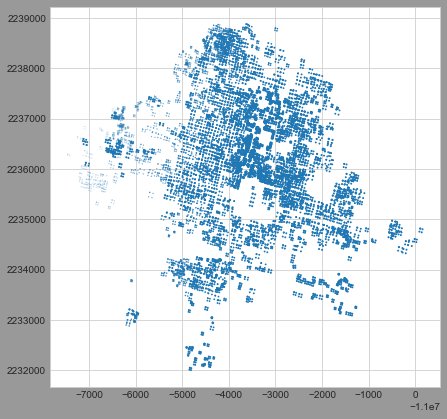

In [99]:
# rsd_show = rsd[::10]

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7), facecolor='.6')
plt.scatter(rsd[:, 0], rsd[:, 1], s = [i/10000 for i in range(13336)])
plt.show()

## Apply MeanShift

In [97]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
# from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

In [129]:
# ms = ms(bandwidth=bandwidth, bin_seeding=True)
ms = MeanShift(bandwidth = 400) # bandwidth is radius

# bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms.fit(rsd)
labels = ms.labels_

# np.unique() -> how many unique elements there are
print('num of clusters:', len(np.unique(labels)))
print('center location: ', ms.cluster_centers_)

num of clusters: 24
center location:  [[-11003588.177    2236205.3969]
 [-11004133.1359   2238474.0905]
 [-11003641.8718   2236800.7569]
 [-11002731.1665   2235747.0381]
 [-11002774.3955   2236885.3372]
 [-11004642.5366   2235733.4742]
 [-11002555.6026   2236398.6554]
 [-11004652.3229   2233899.7483]
 [-11006346.3127   2236835.7922]
 [-11004265.2601   2234768.4169]
 [-11001507.6075   2235410.7695]
 [-11003583.2948   2234719.1206]
 [-11001551.3267   2234743.3683]
 [-11002277.9308   2237492.5871]
 [-11002956.4644   2234830.5298]
 [-11006917.6747   2235771.8209]
 [-11001671.0048   2233678.04  ]
 [-11002247.9121   2233695.9224]
 [-11004638.6874   2232285.4564]
 [-11000380.0171   2234710.6939]
 [-11005752.771    2237265.8242]
 [-11006075.587    2233059.4435]
 [-11004436.9224   2232761.9602]
 [-11006090.3967   2233779.6383]]


|bandwidth|no of cluster|
|-|-|
|100|524|
|200|144|
|400|24|

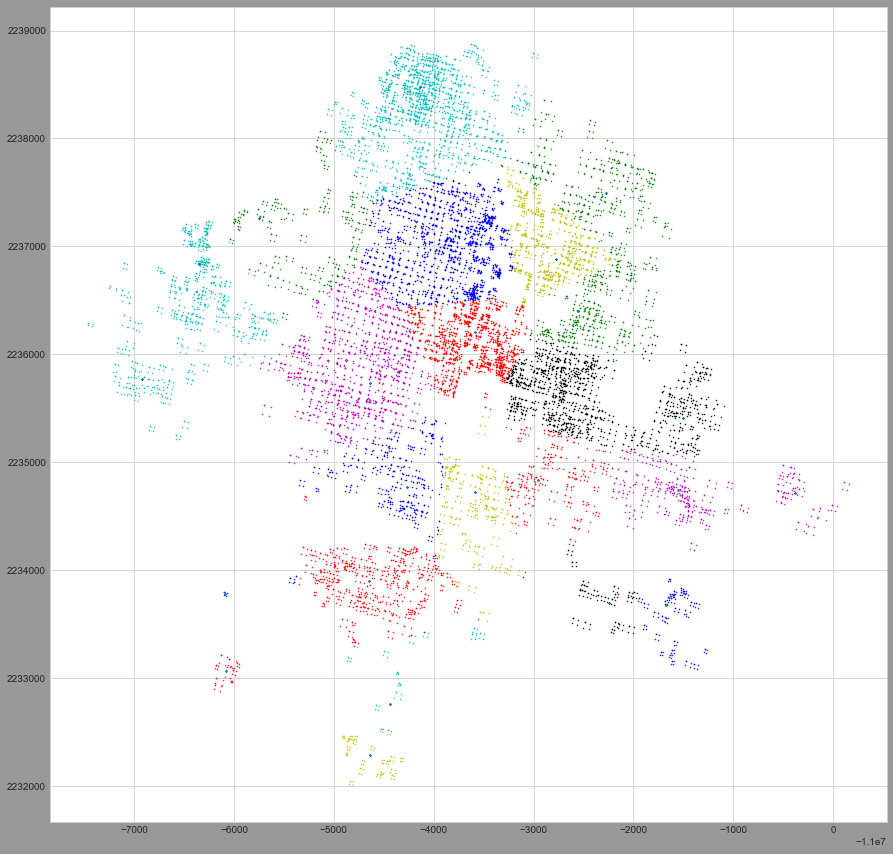

In [131]:
plt.figure(figsize = (15, 15), facecolor = '.6')

colors = ['r.', 'c.', 'b.', 'k.', 'y.', 'm.', 'g.']*1000
labels = ms.cluster_centers_
for i in range(len(rsd)):
    plt.plot(rsd[i][0], rsd[i][1], colors[labels[i]], markersize = 1)
    
plt.scatter(ms.cluster_centers_[:,0], ms.cluster_centers_[:,1],
           marker = 'x', s = 3, linewidths = 0.3, zorder =10)
plt.show()